In [95]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
import shap
# from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
# top features:
top_features = ['feature-1', 'feature-2', 'feature-3', 'feature-4', 'feature-5',
       'feature-6', 'feature-7', 'feature-8', 'feature-9', 'feature-10',
       'feature-11', 'feature-12', 'feature-13', 'feature-14',
       'feature-15', 'feature-16', 'feature-17', 'feature-18',
       'feature-19', 'feature-21', 'feature-22', 'feature-23',
       'feature-24', 'feature-25', 'feature-26', 'feature-27',
       'feature-28', 'feature-30', 'feature-31', 'feature-32',
       'feature-33', 'feature-34', 'feature-35', 'feature-36',
       'feature-37', 'feature-38', 'feature-39', 'feature-40',
       'feature-41', 'feature-42', 'feature-43', 'feature-44',
       'feature-45', 'feature-46', 'feature-47', 'feature-48',
       'feature-49', 'feature-50', 'feature-51', 'feature-52',
       'feature-53', 'feature-54', 'feature-55', 'feature-56',
       'feature-57', 'feature-58', 'feature-59', 'feature-60',
       'feature-61', 'feature-62', 'feature-63', 'feature-64',
       'feature-65', 'feature-66', 'feature-67', 'feature-68',
       'feature-69', 'feature-70', 'feature-71', 'feature-72',
       'feature-73', 'feature-74', 'feature-75', 'feature-76',
       'feature-77', 'feature-78', 'feature-79', 'feature-80',
       'feature-81', 'feature-82', 'feature-83', 'feature-84',
       'feature-85', 'feature-86', 'feature-87', 'feature-88',
       'feature-89', 'feature-90', 'feature-91', 'feature-92',
       'feature-93', 'feature-94', 'feature-95', 'feature-96',
       'feature-97', 'feature-98', 'feature-99', 'feature-100',
       'feature-101', 'feature-102', 'feature-103', 'feature-104',
       'feature-105', 'feature-106', 'feature-107', 'feature-108',
       'feature-109', 'feature-110', 'feature-111', 'feature-112',
       'feature-113', 'feature-114', 'feature-115', 'feature-116',
       'feature-117', 'feature-118', 'feature-119', 'feature-120',
       'feature-121', 'feature-122', 'feature-123', 'feature-124',
       'feature-125', 'feature-126', 'feature-127', 'feature-128',
       'feature-129', 'feature-130', 'feature-131', 'feature-132',
       'feature-133', 'feature-134', 'feature-135', 'feature-136',
       'feature-137', 'feature-138', 'feature-139', 'feature-140',
       'feature-141', 'feature-142', 'feature-143', 'feature-144',
       'feature-145', 'feature-146', 'feature-147', 'feature-148',
       'feature-149', 'feature-150', 'feature-151', 'feature-152',
       'feature-153', 'feature-154', 'feature-155', 'feature-156',
       'feature-157', 'feature-158', 'feature-159', 'feature-160',
       'feature-161', 'feature-162', 'feature-163', 'feature-164',
       'feature-165', 'feature-166', 'feature-167', 'feature-168',
       'feature-169', 'feature-170', 'feature-171', 'feature-172',
       'feature-173', 'feature-174', 'feature-175', 'feature-176',
       'feature-177', 'feature-178', 'feature-179', 'feature-180',
       'feature-181', 'feature-182', 'feature-183', 'feature-184',
       'feature-185', 'feature-186', 'feature-187', 'feature-188',
       'feature-189', 'feature-190', 'feature-191', 'feature-192',
       'feature-193', 'feature-194', 'feature-195', 'feature-196',
       'feature-197', 'feature-198', 'feature-199', 'feature-200',
       'feature-201', 'feature-202', 'feature-203', 'feature-204',
       'feature-205', 'feature-206', 'feature-207', 'feature-208',
       'feature-209', 'feature-210', 'feature-211', 'feature-212',
       'feature-213', 'feature-214', 'feature-215', 'feature-216',
       'feature-217', 'feature-218', 'feature-219', 'feature-220',
       'feature-221', 'feature-222', 'feature-223', 'feature-224',
       'feature-225', 'feature-226', 'feature-227', 'feature-228',
       'feature-229', 'feature-230', 'feature-231', 'feature-232',
       'feature-233', 'feature-234', 'feature-235', 'feature-236',
       'feature-237', 'feature-238', 'feature-239', 'feature-240',
       'feature-241', 'feature-242', 'feature-243', 'feature-244',
       'feature-245', 'feature-247', 'feature-248', 'feature-249',
       'feature-252', 'feature-253', 'feature-254', 'feature-255',
       'feature-256', 'feature-257', 'feature-258', 'feature-259',
       'feature-261', 'feature-262', 'feature-263', 'feature-264',
       'feature-265', 'feature-266', 'feature-267', 'feature-268',
       'feature-270', 'feature-271', 'feature-272', 'feature-273',
       'feature-274', 'feature-275', 'feature-277', 'feature-279',
       'feature-280', 'feature-281', 'feature-282', 'feature-283',
       'feature-284', 'feature-285', 'feature-286', 'feature-287',
       'feature-288', 'feature-289', 'feature-290', 'feature-291',
       'feature-292', 'feature-293', 'feature-294', 'feature-295',
       'feature-296', 'feature-297', 'feature-298', 'feature-299',
       'feature-300', 'feature-301', 'feature-302', 'feature-303',
       'feature-304', 'feature-305', 'feature-306', 'feature-307',
       'feature-308', 'feature-309', 'feature-310', 'feature-311',
       'feature-312', 'feature-313', 'feature-314', 'feature-315',
       'feature-316', 'feature-317', 'feature-318', 'feature-319',
       'feature-320', 'feature-321', 'feature-322', 'feature-323',
       'feature-324', 'feature-325', 'feature-326', 'feature-327',
       'feature-328', 'feature-329', 'feature-330', 'feature-331',
       'feature-332', 'feature-333', 'feature-334', 'feature-335',
       'feature-336', 'feature-337', 'feature-338', 'feature-339',
       'feature-340', 'feature-341', 'feature-342', 'feature-343',
       'feature-344', 'feature-345', 'feature-346', 'feature-347',
       'feature-348', 'feature-349', 'feature-350', 'feature-351',
       'feature-352', 'feature-353', 'feature-354', 'feature-355',
       'feature-356', 'feature-357', 'feature-358', 'feature-359',
       'feature-360', 'feature-361', 'feature-362', 'feature-363',
       'feature-364', 'feature-365', 'feature-366', 'feature-367',
       'feature-368', 'feature-369', 'feature-370', 'feature-371',
       'feature-372', 'feature-373', 'feature-374', 'feature-375',
       'feature-376', 'feature-377', 'feature-378', 'feature-379',
       'feature-380', 'feature-381', 'feature-382', 'feature-383',
       'feature-385', 'feature-386', 'feature-387', 'feature-388',
       'feature-389', 'feature-390', 'feature-391', 'feature-392',
       'feature-394', 'feature-395', 'feature-396', 'feature-397',
       'feature-398', 'feature-399', 'feature-400', 'feature-401',
       'feature-403', 'feature-404', 'feature-405', 'feature-406',
       'feature-407', 'feature-408', 'feature-409', 'feature-410',
       'feature-411', 'feature-412', 'feature-413', 'feature-414',
       'feature-415', 'feature-416', 'feature-417', 'feature-418',
       'feature-419', 'feature-420', 'feature-421', 'feature-422',
       'feature-423', 'feature-424', 'feature-425', 'feature-426',
       'feature-427', 'feature-428', 'feature-429', 'feature-430',
       'feature-431', 'feature-432', 'feature-433', 'feature-434',
       'feature-435', 'feature-436', 'feature-437', 'feature-438',
       'feature-439', 'feature-440', 'feature-441', 'feature-442',
       'feature-443', 'feature-444', 'feature-445', 'feature-446',
       'feature-447', 'feature-448', 'feature-449', 'feature-450',
       'feature-451', 'feature-452', 'feature-453', 'feature-454',
       'feature-455', 'feature-456', 'feature-457', 'feature-458',
       'feature-459', 'feature-460', 'feature-461', 'feature-462',
       'feature-463', 'feature-464', 'feature-465', 'feature-466',
       'feature-467', 'feature-468', 'feature-469', 'feature-470',
       'feature-471', 'feature-472', 'feature-473', 'feature-474',
       'feature-475', 'feature-476', 'feature-477', 'feature-478',
       'feature-479', 'feature-480', 'feature-481', 'feature-482',
       'feature-483', 'feature-484', 'feature-485', 'feature-486',
       'feature-487', 'feature-488', 'feature-489', 'feature-490',
       'feature-491', 'feature-492', 'feature-493', 'feature-494',
       'feature-495', 'feature-496', 'feature-497', 'feature-498',
       'feature-501', 'feature-502', 'feature-503', 'feature-504',
       'feature-505', 'feature-506', 'feature-507', 'feature-508',
       'feature-510', 'feature-511', 'feature-512', 'feature-513',
       'feature-514', 'feature-515', 'feature-517', 'feature-519',
       'feature-520', 'feature-521', 'feature-522', 'feature-523',
       'feature-524', 'feature-526', 'feature-528', 'feature-529',
       'feature-530', 'feature-531', 'feature-532', 'feature-533',
       'feature-534', 'feature-535', 'feature-536', 'feature-537',
       'feature-538', 'feature-539', 'feature-540', 'feature-541',
       'feature-542', 'feature-543', 'feature-544', 'feature-545',
       'feature-546', 'feature-547', 'feature-548', 'feature-549',
       'feature-550', 'feature-551', 'feature-552', 'feature-553',
       'feature-554', 'feature-555', 'feature-556', 'feature-557',
       'feature-558', 'feature-559', 'feature-560', 'feature-561',
       'feature-562', 'feature-563', 'feature-564', 'feature-565',
       'feature-566', 'feature-567', 'feature-568', 'feature-569',
       'feature-570', 'feature-571', 'feature-572', 'feature-573',
       'feature-574', 'feature-575', 'feature-576', 'feature-577',
       'feature-578', 'feature-579', 'feature-580', 'feature-581',
       'feature-582', 'feature-583', 'feature-584', 'feature-585',
       'feature-586', 'feature-587', 'feature-588', 'feature-589',
       'feature-590', 'feature-591', 'feature-592', 'feature-593',
       'feature-594', 'feature-595', 'feature-596', 'feature-597',
       'feature-598', 'feature-599', 'feature-600', 'feature-601',
       'feature-602', 'feature-603', 'feature-604', 'feature-605',
       'feature-606', 'feature-607', 'feature-608', 'feature-609',
       'feature-610', 'feature-611', 'feature-612', 'feature-613',
       'feature-614', 'feature-615', 'feature-616', 'feature-617',
       'feature-618', 'feature-619', 'feature-620', 'feature-621',
       'feature-622', 'feature-623', 'feature-624', 'feature-625',
       'feature-626', 'feature-627', 'feature-628', 'feature-629',
       'feature-630', 'feature-631', 'feature-632', 'feature-634',
       'feature-635', 'feature-636', 'feature-637', 'feature-638',
       'feature-639', 'feature-640', 'feature-641', 'feature-643',
       'feature-644', 'feature-645', 'feature-646', 'feature-647',
       'feature-648', 'feature-649', 'feature-650', 'feature-652',
       'feature-653', 'feature-654', 'feature-655', 'feature-656',
       'feature-657', 'feature-658', 'feature-659', 'feature-661',
       'feature-662', 'feature-663', 'feature-664', 'feature-665',
       'feature-666', 'feature-667', 'feature-668', 'feature-669',
       'feature-670', 'feature-671', 'feature-672', 'feature-673',
       'feature-674', 'feature-675', 'feature-676', 'feature-677',
       'feature-678', 'feature-679', 'feature-680', 'feature-681',
       'feature-682', 'feature-683', 'feature-684', 'feature-685',
       'feature-686', 'feature-687', 'feature-688', 'feature-689',
       'feature-690', 'feature-691', 'feature-692', 'feature-693',
       'feature-694', 'feature-695', 'feature-696', 'feature-697',
       'feature-698', 'feature-699', 'feature-700', 'feature-701',
       'feature-702', 'feature-703', 'feature-704', 'feature-705',
       'feature-706', 'feature-707', 'feature-708', 'feature-709',
       'feature-710', 'feature-711', 'feature-712', 'feature-713',
       'feature-714', 'feature-715', 'feature-716', 'feature-717',
       'feature-718', 'feature-719', 'feature-720', 'feature-721',
       'feature-722', 'feature-723', 'feature-724', 'feature-725',
       'feature-726', 'feature-727', 'feature-728', 'feature-729',
       'feature-730', 'feature-731', 'feature-732', 'feature-733',
       'feature-734', 'feature-735', 'feature-736', 'feature-737',
       'feature-738', 'feature-739', 'feature-740', 'feature-741',
       'feature-742', 'feature-743', 'feature-744', 'feature-745',
       'feature-746', 'feature-747', 'feature-750', 'feature-751']

In [97]:
df = pd.read_csv('source.csv')
features = list(df.drop(columns=['data_split','target']).columns)
# features = top_features
le = LabelEncoder()
df['target_encoded'] = le.fit_transform(df['target']) # 0 > -1 and 1 > +4

In [98]:
train = df[df['data_split']=='TRAIN']
valid = df[df['data_split']=='VALIDATE']
test = df[df['data_split']=='TEST']

In [99]:
# Preprocessing
scaler = MinMaxScaler().fit(train[features])

train_ = scaler.transform(train[features])
valid_ = scaler.transform(valid[features])
test_ = scaler.transform(test[features])

x_tr, y_tr = train_, train['target_encoded']
x_va, y_va = valid_, valid['target_encoded']
x_ts, y_ts = test_, test['target_encoded']

In [100]:
# x_tr, y_tr = train[features], train['target_encoded']
# x_va, y_va = valid[features], valid['target_encoded']
# x_ts, y_ts = test[features], test['target_encoded']

In [101]:
# scale_pos_weight = len(df[df['target_encoded']==0]) / len(df[df['target_encoded']==1])
# scale_pos_weight

In [102]:
model = LogisticRegression(
    max_iter=3500,
    penalty="l1",  
    C=0.01,  
    class_weight={0: 1, 1: 6},  # 10x weight for +4
    solver="liblinear",
)

model.fit(x_tr, y_tr)

LogisticRegression(C=0.01, class_weight={0: 1, 1: 6}, max_iter=3500,
                   penalty='l1', solver='liblinear')

In [103]:
# calibrated_model = CalibratedClassifierCV(model, method='isotonic', cv=5)
# calibrated_model.fit(x_va, y_va)

In [104]:
proba_tr = model.predict_proba(x_tr)[:, 1]
proba_va = model.predict_proba(x_va)[:, 1]
proba_ts = model.predict_proba(x_ts)[:, 1]

In [105]:
# cal_proba_tr = calibrated_model.predict_proba(x_tr)[:, 1]
# cal_proba_va = calibrated_model.predict_proba(x_va)[:, 1]
# cal_proba_ts = calibrated_model.predict_proba(x_ts)[:, 1]

# proba_tr = cal_proba_tr
# proba_va = cal_proba_va
# proba_ts = cal_proba_ts

In [106]:
threshold_list = list()
train_sum = list()
valid_sum = list()
test_sum = list()

thresholds = np.arange(0.05, 0.99, 0.01)
for t in thresholds:
    filter_tr = proba_tr >= t
    filter_va = proba_va >= t
    filter_ts = proba_ts >= t
    sum_target_before_tr = train["target"].sum()
    sum_target_before_va = valid["target"].sum()
    sum_target_before_ts = test["target"].sum()
    sum_target_after_tr = train["target"][filter_tr].sum()
    sum_target_after_va = valid["target"][filter_va].sum()
    sum_target_after_ts = test["target"][filter_ts].sum()
    # print(f"Train:| {sum_target_before_tr} | {sum_target_after_tr}")
    # print(f"Valid:| {sum_target_before_va} | {sum_target_after_va}")
    # print(f"Test :| {sum_target_before_ts} | {sum_target_after_ts}")
    threshold_list.append(t)
    train_sum.append(sum_target_after_tr)
    valid_sum.append(sum_target_after_va)
    test_sum.append(sum_target_after_ts)

In [107]:
results_df = pd.DataFrame(
    {
        'Threshold': threshold_list,
        'Train Post': train_sum,
        'Valid Post': valid_sum,
        'Test Post': test_sum,
    }
)
results_df

,Threshold,Train Post,Valid Post,Test Post
0,0.05,-1089,289,-199
1,0.06,-1089,289,-199
2,0.07,-1089,289,-199
3,0.08,-1089,289,-199
4,0.09,-1089,289,-199
...,...,...,...,...
89,0.94,0,0,0
90,0.95,0,0,0
91,0.96,0,0,0
92,0.97,0,0,0


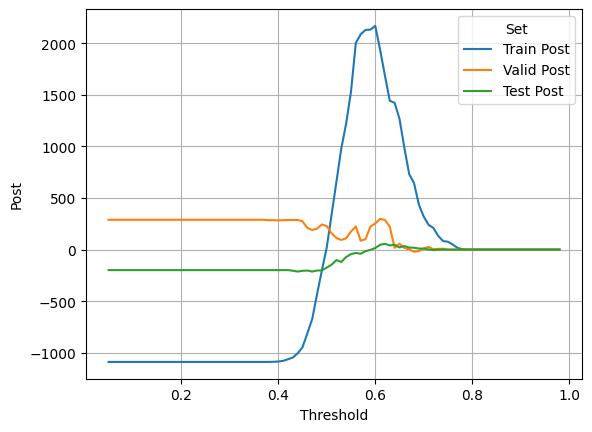

    Threshold  Train Post  Valid Post  Test Post
44       0.49        -200         243       -201
45       0.50          21         228       -175
46       0.51         340         158       -146
47       0.52         659         112       -102
48       0.53         981          93       -120
49       0.54        1221         110        -72
50       0.55        1531         175        -44
51       0.56        2004         224        -33
52       0.57        2087          86        -40
53       0.58        2129         101        -15
54       0.59        2132         223         -3
55       0.60        2168         253         15
56       0.61        1938         297         46
57       0.62        1686         287         56
58       0.63        1443         222         40
59       0.64        1422          16         47
60       0.65        1268          58         21
61       0.66         989          16         34
62       0.67         732           2         19
63       0.68       

In [116]:
results_long = results_df.melt(id_vars="Threshold", var_name="Set", value_name="Post")
sns.lineplot(data=results_long, x="Threshold", y="Post", hue="Set")
plt.grid()
plt.show()
print(results_df.tail(50))

In [109]:
# result = permutation_importance(
#     model, x_va, y_va, n_repeats=10, random_state=1, scoring="roc_auc", n_jobs=-1
# )

In [110]:
# explainer = shap.Explainer(model, x_tr)
# shap_values = explainer(x_tr)

In [111]:
# shap_values.values.mean(axis=0)

In [112]:
# perm_imp = pd.DataFrame(
#     {
#         'Feature': features,
#         'Importance': shap_values.values.mean(axis=0)
#     }
# )
# perm_imp.sort_values(by='Importance', ascending=False)

In [113]:
# perm_imp[perm_imp["Importance"] != 0]["Feature"].values